In [1]:
import numpy as np 
import pandas as pd
import sys
import gzip
import urllib.request
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
sys.path.append('..')
from utils import tools as tl

### TRANSCRIPTION FACTORS ROC CURVES

tives = 7
 

feature 484
tag : K562_c-Jun_IFNg6h
chromosome : chr9 [30000924 - 38000661] 
 positives = 10
 

feature 485
tag : K562_c-Jun_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 7
 

feature 486
tag : K562_c-Myc_IFNa30
chromosome : chr9 [30000924 - 38000661] 
 positives = 4
 

feature 487
tag : K562_c-Myc_IFNa6h
chromosome : chr9 [30000924 - 38000661] 
 positives = 5
 

feature 488
tag : K562_c-Myc_IFNg30
chromosome : chr9 [30000924 - 38000661] 
 positives = 16
 

feature 489
tag : K562_c-Myc_IFNg6h
chromosome : chr9 [30000924 - 38000661] 
 positives = 8
 

feature 490
tag : K562_c-Myc_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 15
 

feature 491
tag : K562_c-Myc_None.1
chromosome : chr9 [30000924 - 38000661] 
 positives = 2
 

feature 492
tag : K562_COREST_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 3
 

feature 493
tag : K562_COREST_None.1
chromosome : chr9 [30000924 - 38000661] 
 positives = 8
 

feature 494
tag : K562_CTCF_None.2
chr

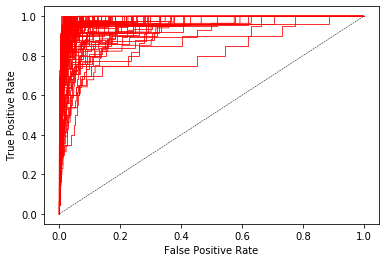

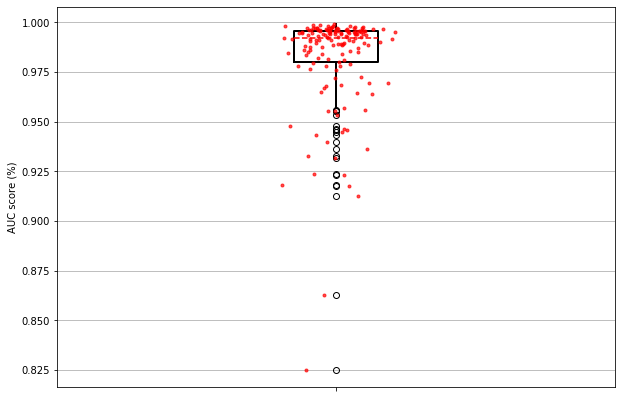

In [2]:
##################################
###### Transciption Factors ######
##################################

h = ['chrom', 'chromStart', 'chromEnd']
TF_seqs_ = pd.read_csv('..\\data\\BED_test_data\\chrom9_5000.bed', sep = '\t', comment = 't', header = None)
TF_seqs_.columns = h[:len(TF_seqs_.columns)]
TF_seqs_sorted = TF_seqs_.sort_values(by=['chromStart'], ascending=True).reset_index()
start_idx = TF_seqs_sorted['chromStart'].min()
end_idx = TF_seqs_sorted['chromEnd'].max()
TFs_output = tl.load_out_bed('..\\data\\BED_test_outputs\\chrom9_5000.bed.out')
all_tf_features = tl.extract_features(tf=True )

pyplot.plot([0,1], [0,1], linestyle='--',  color='k', linewidth=0.5) # plot the 'random model' lines

all_scores = []

for i in range (len(all_tf_features)):

        tf_ref = tl.extract_ref(all_tf_features, all_tf_features[i], tf = True)
        id = tf_ref[1]
        profile = tl.generate_chro_profile_from_file('..\\data\\TF_chromatin_profiles\\' + id + '.bed', 'chr9')
        filter_profile = profile[(profile['peakStart'] >= start_idx) & (profile['peakEnd'] <= end_idx) ]
        test_input = tl.generate_mini_test_set(TF_seqs_sorted, filter_profile)
        target, yhat, yhat_norm, ones, score = tl.predict_from_DeepSEA(tf_ref, test_input, TFs_output, 20, color='red')

        all_scores.append(score)


all_scores = list(filter(lambda x: x!= 0, all_scores))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('')
# pyplot.legend()
# show the plot
pyplot.show()

tl.boxplot(all_scores, title='', marker='r.')


### DNASE HYPERSENSITIVE SITES (DHS) ROC CURVES

feature 1
tag : AoSMC_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 45
 

feature 2
tag : Chorion_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 68
 

feature 3
tag : CLL_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 38
 

feature 4
tag : Fibrobl_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 128
 

feature 5
tag : FibroP_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 80
 

feature 6
tag : Gliobla_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 48
 

feature 7
tag : GM12891_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 49
 

feature 8
tag : GM12892_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 64
 

feature 9
tag : GM18507_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 38
 

feature 10
tag : GM19238_DNase_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 57
 

feature 11
tag : GM19239_DNase_None
chromosome : chr9 [

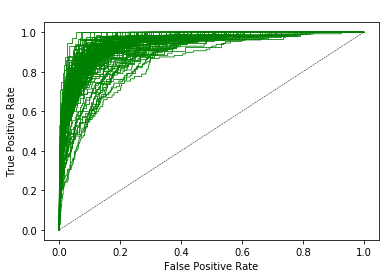

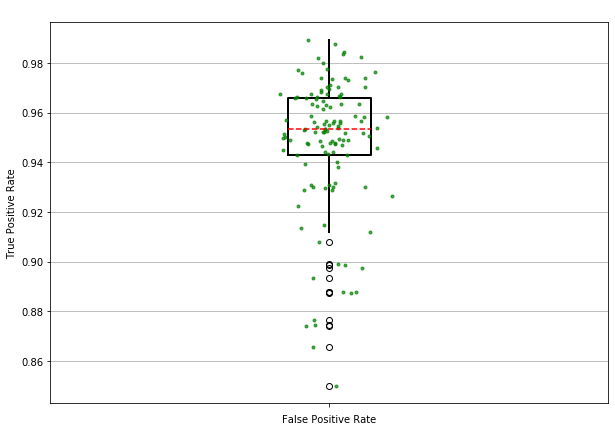

In [3]:
#############################################
####### DNase hypersensitive sites ##########
#############################################

h = ['chrom', 'chromStart', 'chromEnd']
DNASE_seqs_ = pd.read_csv('..\\data\\BED_test_data\\chrom9_5000.bed', sep = '\t', comment = 't', header = None)
DNASE_seqs_.columns = h[:len(DNASE_seqs_.columns)]
DNASE_seqs_sorted = DNASE_seqs_.sort_values(by=['chromStart'], ascending=True).reset_index()
start_idx = DNASE_seqs_sorted['chromStart'].min()
end_idx = DNASE_seqs_sorted['chromEnd'].max()
output = tl.load_out_bed('..\\data\\BED_test_outputs\\chrom9_5000.bed.out')
all_dnase_features = tl.extract_features(dnase=True )

pyplot.plot([0,1], [0,1], linestyle='--',  color='k', linewidth=0.5) # plot the 'random model' lines

all_scores_2 = []


for i in range (len(all_dnase_features)):

        dnase_ref = tl.extract_ref(all_dnase_features, all_dnase_features[i], dnase = True)
        id = dnase_ref[1]
        profile = tl.generate_chro_profile_from_file('..\\data\\DNASE_chromatin_profiles\\' + id + '.bed', 'chr9')
        filter_profile = profile[(profile['peakStart'] >= start_idx) & (profile['peakEnd'] <= end_idx) ]
        test_input = tl.generate_mini_test_set(DNASE_seqs_sorted, filter_profile)
        
        target, yhat, yhat_norm, ones_2, score = tl.predict_from_DeepSEA(dnase_ref, test_input, output, 20, color='green')


        all_scores_2.append(score)


all_scores_2 = list(filter(lambda x: x!= 0, all_scores_2))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title(' ')
# pyplot.legend()
# show the plot
pyplot.show()

tl.boxplot(all_scores_2, title='  ', marker='g.')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('  ')
# pyplot.legend()
# show the plot
pyplot.show()



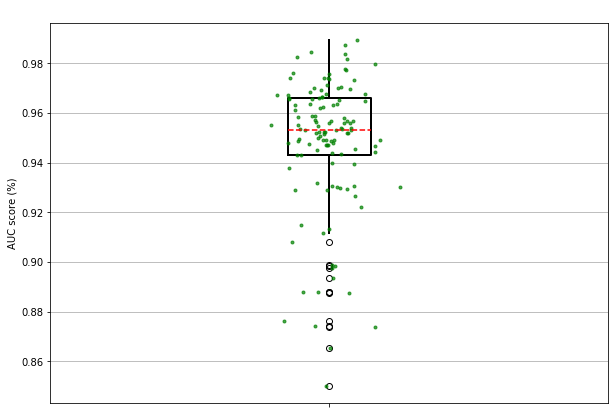

In [3]:
tl.boxplot(all_scores, title='  ', marker='g.')


### HISTONE MARKS ROC CURVES

feature 1
tag : H1-hESC_H2AK5ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 17
 

feature 2
tag : H1-hESC_H2AZ_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 112
 

feature 3
tag : H1-hESC_H2BK120ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 13
 

feature 4
tag : H1-hESC_H2BK12ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 30
 

feature 5
tag : H1-hESC_H2BK15ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 11
 

feature 6
tag : H1-hESC_H2BK20ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 11
 

feature 7
tag : H1-hESC_H2BK5ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 38
 

feature 8
tag : H1-hESC_H3K14ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 14
 

feature 9
tag : H1-hESC_H3K18ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 65
 

feature 10
tag : H1-hESC_H3K23ac_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 9
 

feature 11
tag : H1-hESC_H3

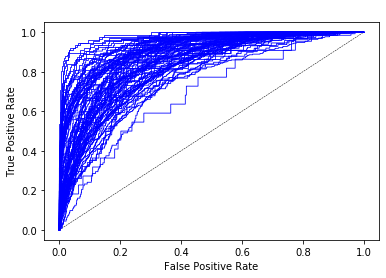

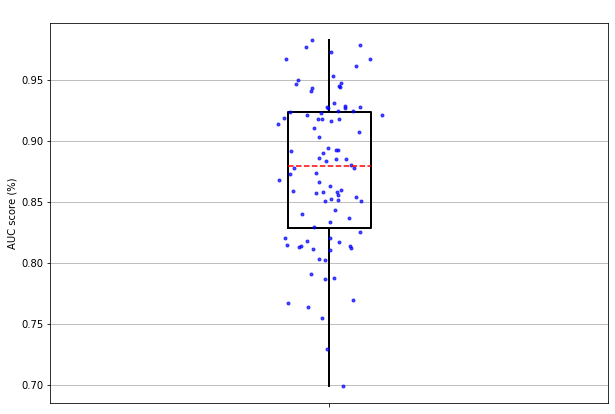

In [14]:
##############################
####### Histone Marks ########
##############################

h = ['chrom', 'chromStart', 'chromEnd']
HM_seqs_ = pd.read_csv('..\\data\\BED_test_data\\chrom9_5000.bed', sep = '\t', comment = 't', header = None)
HM_seqs_.columns = h[:len(HM_seqs_.columns)]
HM_seqs_sorted = HM_seqs_.sort_values(by=['chromStart'], ascending=True).reset_index()
start_idx = HM_seqs_sorted['chromStart'].min()
end_idx = HM_seqs_sorted['chromEnd'].max()
output = tl.load_out_bed('..\\data\\BED_test_outputs\\chrom9_5000.bed.out')
all_hm_features = tl.extract_features(histone_mark=True )

pyplot.plot([0,1], [0,1], linestyle='--',  color='k', linewidth=0.5) # plot the 'random model' lines

all_scores_3 = []

for i in range (len(all_hm_features)):

        hm_ref = tl.extract_ref(all_hm_features, all_hm_features[i], hk=True)
        id = hm_ref[1]
        profile = tl.generate_chro_profile_from_file('..\\data\\HM_chromatin_profiles\\' + id + '.bed', 'chr9')
        filter_profile = profile[(profile['peakStart'] >= start_idx) & (profile['peakEnd'] <= end_idx) ]
        test_input = tl.generate_mini_test_set(HM_seqs_sorted, filter_profile)
        
        target, yhat, yhat_norm, ones_3, score = tl.predict_from_DeepSEA(hm_ref, test_input, output, 20, color='blue')

        all_scores_3.append(score)


all_scores_3 = list(filter(lambda x: x!= 0, all_scores_3))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title(' ')
# pyplot.legend()
# show the plot
pyplot.show()

tl.boxplot(all_scores_3, title=' ', marker='b.')


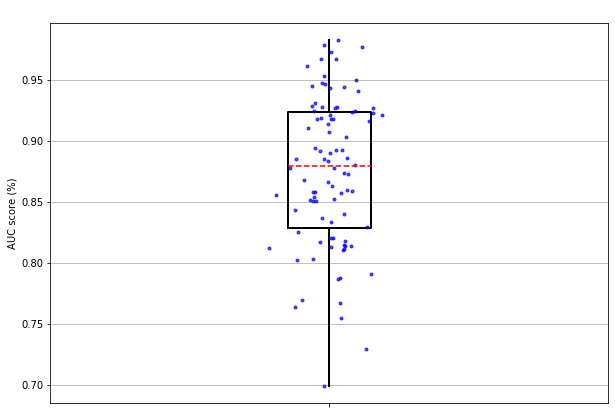

In [4]:
tl.boxplot(all_scores, title=' ', marker='b.')


In [ ]:
#############################################################
# draw roc curve for all NFKB features and a boxplot of AUC #
#############################################################


# extract features labels for transcription factors as a list 
tf_labels = tl.extract_features(tf=True)

# gets indices for all NFKB occurences 
idx_ = [i for i, x in enumerate(tf_labels) if 'CREB1' in x]

# construct the sequences which will be analyzed ba the model for prediciton 
h = ['chrom', 'chromStart', 'chromEnd']
TF_seqs_ = pd.read_csv('..\\data\\test_data\\chrom9_5000.bed', sep = '\t', comment = 't', header = None)
TF_seqs_.columns = h[:len(TF_seqs_.columns)]
TF_seqs_sorted = TF_seqs_.sort_values(by=['chromStart'], ascending=True).reset_index()
start_idx = TF_seqs_sorted['chromStart'].min()
end_idx = TF_seqs_sorted['chromEnd'].max()

# get the output from the model 
TFs_output = tl.load_out_bed('..\\data\\test_outputs\\chrom9_5000.bed.out')

# prepare ROC plot with 'random model' curve 
pyplot.plot([0,1], [0,1], linestyle='--',  color='k', linewidth=0.5)

# list to keep track of scores 
scores = np.empty(len(idx_))

# loop through all NFKB features 
for i, el in enumerate (idx_):

        tf_ref = tl.extract_ref(tf_labels, tf_labels[el], tf = True)
        id = tf_ref[1]
        print(id)
        profile = tl.generate_chro_profile_from_file('..\\data\\TF_chromatin_profiles\\' + id + '.bed', 'chr9')
        filter_profile = profile[(profile['peakStart'] >= start_idx) & (profile['peakEnd'] <= end_idx) ]
        test_input = tl.generate_mini_test_set(TF_seqs_sorted, filter_profile)
        
        # get target labels and prediction from DeppSEA  
        target, yhat, yhat_norm, ones, score = tl.predict_from_DeepSEA(tf_ref, test_input, TFs_output, 5)
        scores[i]=score

# final plot show 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Trancription factors')
plt.show()

# boxplot of auc scores 

In [8]:
print(np.mean(all_scores))
print(np.std(all_scores))


0.9819829962326613
0.025076546098050406


In [15]:
print(np.mean(all_scores_3))
print(np.std(all_scores_3))

0.8752959583579759
0.06102031478963269


In [13]:
all_scores_3 == all_scores

True

feature 203
tag : HepG2_USF-1_None
chromosome : chr9 [30000924 - 38000661] 
 positives = 8
 



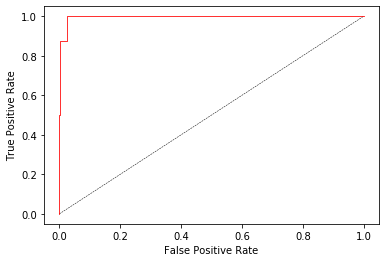

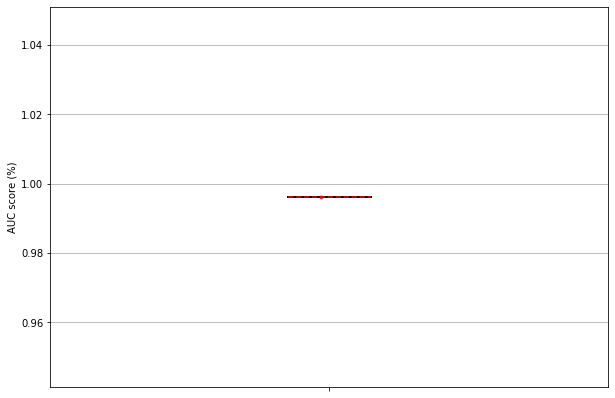

In [6]:
##################################
###### Transciption Factors ######
##################################

h = ['chrom', 'chromStart', 'chromEnd']
TF_seqs_ = pd.read_csv('..\\data\\BED_test_data\\chrom9_5000.bed', sep = '\t', comment = 't', header = None)
TF_seqs_.columns = h[:len(TF_seqs_.columns)]
TF_seqs_sorted = TF_seqs_.sort_values(by=['chromStart'], ascending=True).reset_index()
start_idx = TF_seqs_sorted['chromStart'].min()
end_idx = TF_seqs_sorted['chromEnd'].max()
TFs_output = tl.load_out_bed('..\\data\\BED_test_outputs\\chrom9_5000.bed.out')
all_tf_features = tl.extract_features(tf=True )

pyplot.plot([0,1], [0,1], linestyle='--',  color='k', linewidth=0.5) # plot the 'random model' lines

all_scores = []


tf_ref = tl.extract_ref(all_tf_features, 'HepG2|USF-1|None', tf = True)
id = tf_ref[1]
profile = tl.generate_chro_profile_from_file('..\\data\\TF_chromatin_profiles\\' + id + '.bed', 'chr9')
filter_profile = profile[(profile['peakStart'] >= start_idx) & (profile['peakEnd'] <= end_idx) ]
test_input = tl.generate_mini_test_set(TF_seqs_sorted, filter_profile)
target, yhat, yhat_norm, ones, score = tl.predict_from_DeepSEA(tf_ref, test_input, TFs_output, 5, color='red')

all_scores.append(score)


all_scores = list(filter(lambda x: x!= 0, all_scores))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('')
# pyplot.legend()
# show the plot
pyplot.show()

tl.boxplot(all_scores, title='', marker='r.')
